In [1]:
# Configs

label_name = "math"
embedding_type = "perf" # time or perf

In [2]:
import pandas as pd
import matplotlib
import numpy as np
from sklearn import tree

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

np.set_printoptions(precision=3, suppress=True)

In [3]:
dataset = pd.read_csv(f"../../dataset/{embedding_type}/{label_name}_dataset.csv")
dataset = pd.get_dummies(dataset)

train, test = train_test_split(dataset, test_size=0.33, random_state=42, shuffle=True)

train_dataset_features = train.copy().drop('label', axis=1)
train_dataset_labels = train.copy().pop('label')

test_dataset_features = test.copy().drop('label', axis=1)
test_dataset_labels = test.copy().pop('label')

dataset.head()

,branch-misses_FEATURE_CONFIG,branch-misses_INTERCEPT,branch-misses_R-VAL,branches_FEATURE_CONFIG,branches_INTERCEPT,branches_R-VAL,context-switches_FEATURE_CONFIG,context-switches_INTERCEPT,context-switches_R-VAL,cpu-migrations_FEATURE_CONFIG,...,stalled-cycles-frontend_FEATURE_TYPE_LOGLOG_POLYNOMIAL,stalled-cycles-frontend_FEATURE_TYPE_LOG_POLYNOMIAL,stalled-cycles-frontend_FEATURE_TYPE_POLYNOMIAL,stalled-cycles-frontend_FEATURE_TYPE_POWER,task-clock_FEATURE_TYPE_FACTORIAL,task-clock_FEATURE_TYPE_FRACTIONAL_POWER,task-clock_FEATURE_TYPE_LOGLOG_POLYNOMIAL,task-clock_FEATURE_TYPE_LOG_POLYNOMIAL,task-clock_FEATURE_TYPE_POLYNOMIAL,task-clock_FEATURE_TYPE_POWER
0,0.0,12176.278640,5.274472,1.0,354489.841881,31.023435,0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,1,0
1,0.8,12300.866448,140.866882,0.1,360567.282593,278.416553,0,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.0,12396.648839,38.928139,1.0,358483.822954,81.019933,0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,1,0
3,4.0,12358.582719,-0.000011,1.0,355754.502857,256.760672,0,0.0,0.0,0,...,0,0,0,1,0,1,0,0,0,0
4,1.0,12313.598463,3.715744,1.0,354852.459189,327.289900,0,0.0,0.0,0,...,0,1,0,0,0,1,0,0,0,0


In [4]:
test_dataset_features.sort_index()

,branch-misses_FEATURE_CONFIG,branch-misses_INTERCEPT,branch-misses_R-VAL,branches_FEATURE_CONFIG,branches_INTERCEPT,branches_R-VAL,context-switches_FEATURE_CONFIG,context-switches_INTERCEPT,context-switches_R-VAL,cpu-migrations_FEATURE_CONFIG,...,stalled-cycles-frontend_FEATURE_TYPE_LOGLOG_POLYNOMIAL,stalled-cycles-frontend_FEATURE_TYPE_LOG_POLYNOMIAL,stalled-cycles-frontend_FEATURE_TYPE_POLYNOMIAL,stalled-cycles-frontend_FEATURE_TYPE_POWER,task-clock_FEATURE_TYPE_FACTORIAL,task-clock_FEATURE_TYPE_FRACTIONAL_POWER,task-clock_FEATURE_TYPE_LOGLOG_POLYNOMIAL,task-clock_FEATURE_TYPE_LOG_POLYNOMIAL,task-clock_FEATURE_TYPE_POLYNOMIAL,task-clock_FEATURE_TYPE_POWER
8,2.0,12378.326531,-209.163265,0.0,356091.016439,1.403287e+01,0,0.0,0.0,0,...,0,1,0,0,0,0,0,1,0,0
12,1.0,12213.758169,3.625786,1.0,353659.222153,3.252067e+02,0,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
14,0.0,12116.890361,60.779827,1.0,356370.899267,7.348262e+01,0,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
15,1.0,12371.937143,2.987563,1.0,356527.551020,6.530074e+01,0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,0,1
17,0.0,12247.457746,52.703847,1.0,356387.498915,1.423683e+02,0,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5941,1.0,12314.822883,1.704246,1.0,354975.643034,6.615757e+02,0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,1,0
5943,2.0,12300.387768,-0.000003,4.0,359984.733725,-2.879984e-13,0,0.0,0.0,0,...,0,0,1,0,0,0,0,1,0,0
5944,0.0,12233.320504,75.226898,1.0,359885.417516,2.033561e+03,0,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
5945,0.9,12262.235739,89.969619,2.0,355167.687085,1.331121e-03,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
model = tree.DecisionTreeClassifier()
model.fit(train_dataset_features, train_dataset_labels)

DecisionTreeClassifier()

In [6]:
from graphviz import Source

graph = Source(tree.export_graphviz(model, out_file=None, feature_names=train_dataset_features.columns))
graph.format = 'png'
graph.render('dtree_render',view=True)


'dtree_render.png'

In [7]:
confusion_matrix(train_dataset_labels, model.predict(train_dataset_features))

array([[3274,    0],
       [   0,  711]])

In [8]:
confusion_matrix(test_dataset_labels, model.predict(test_dataset_features))

array([[1623,   40],
       [  33,  268]])

In [9]:
from sklearn.metrics import classification_report

print(classification_report(test_dataset_labels, model.predict(test_dataset_features)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1663
           1       0.87      0.89      0.88       301

    accuracy                           0.96      1964
   macro avg       0.93      0.93      0.93      1964
weighted avg       0.96      0.96      0.96      1964



In [11]:
import pybaobabdt

<Figure size 720x720 with 0 Axes>

/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 1 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 0 missing from current font.
  font.set_text(s, 0.0, flags=flags)


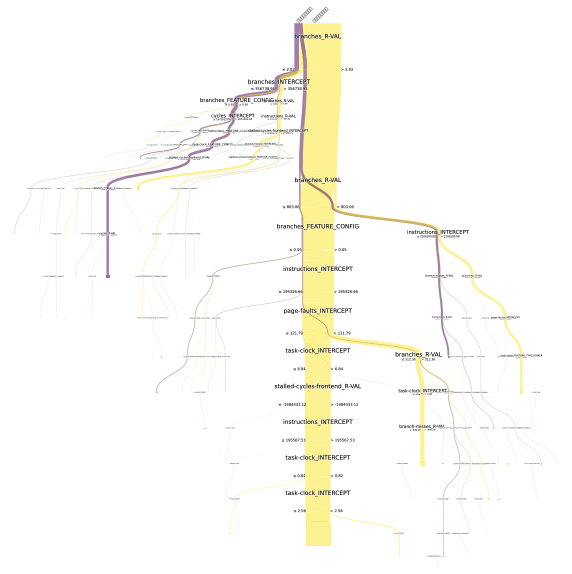

In [15]:
ax = pybaobabdt.drawTree(model, size=10, dpi=72, features=train_dataset_features.keys())

In [16]:
ax.get_figure().savefig('tree.png', format='png', dpi=300, transparent=True)